Importation des modules utiles pour l'étude

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:

def create_coding_table(data, ordinale_order={}):
    tab_de_codage = pd.DataFrame()

    for col in data.columns:
        unique_values = data[col].dropna().unique()
        if col in ordinale_order:
            for val in ordinale_order[col]:
               if val in unique_values:
                    tab_de_codage[f"{col}_{val}"] = 0
        else:
            for val in unique_values:
                tab_de_codage[f"{col}_{val}"] = 0

    for i in range(data.shape[0]):
        for col in data.columns:
            value = data.loc[i, col]
            if pd.notna(value):

                if col in ordinale_order:
                    for val in ordinale_order[col]:
                        tab_de_codage.loc[i, f"{col}_{val}"] = 1
                        if val == value:
                            break
                else:
                    tab_de_codage.loc[i, f"{col}_{value}"] = 1

    tab_de_codage.reset_index(drop=True, inplace=True)
    tab_de_codage = tab_de_codage.fillna(0)
    tab_de_codage = tab_de_codage.astype(int)

    return tab_de_codage

data = './backend/coding_table/dataset_forms.csv'

df = pd.read_csv(data)
ord = {'Q3': [1, 2, 3, 4, 5], 'Q5': ['Non, pas du tout', 'Non, pas suffisamment', 'Oui, mais il manque certains aspects pratiques', 'Oui, complètement']}
create_coding_table(df, ordinale_order=ord)

,Q1_Masculin,Q1_Feminin,Q2_Science de Données,Q2_Sécurité Informatique,Q2_Intelligence Artificielle,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,...,"Q5_Non, pas du tout","Q5_Non, pas suffisamment","Q5_Oui, mais il manque certains aspects pratiques","Q5_Oui, complètement",Q6_Devenir employé en grandes entreprises,Q6_Recherche scientifique,Q6_Je ne sais pas encore,Q6_Créer une start-up,"Q6_Domaine commerciale (par exemple, vente de produits, de formations etc..)",Q6_Travailler en freelance
0,1,0,1,0,0,1,1,1,1,0,...,1,1,1,0,1,0,0,0,0,0
1,0,1,1,0,0,1,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
2,1,0,0,1,0,1,1,1,0,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,1,1,1,0,0,...,1,1,0,0,0,0,0,1,0,0
5,1,0,1,0,0,1,1,1,1,1,...,1,1,1,0,1,0,0,0,0,0
6,1,0,1,0,0,1,1,1,1,1,...,1,1,1,0,0,1,0,0,0,0
7,1,0,0,0,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,1,0
8,1,0,1,0,0,1,1,1,1,0,...,1,1,1,0,0,0,0,0,0,1
9,1,0,0,0,1,1,1,1,0,0,...,1,1,1,0,0,0,0,0,0,1


Affichage des informations du tableau de données

On organise les données en ajoutant un identifiant

In [7]:
def tab_de_distance(file):

  tab_codage = pd.read_csv(file)

  # Mesure de ressemblance
  rows, columns = tab_codage.shape
  tab_de_distance = pd.DataFrame(np.zeros((columns, columns)), columns=tab_codage.columns)

  def calcRessemblance(a, b):
    resultat = 0
    for i in range(0, len(a)):
      if(a[i] == b[i]):
        resultat += 1
    return resultat/len(a)
      

  for i in range(0, len(tab_codage.columns)):
    for j in range(0, len(tab_codage.columns)):
      tab_de_distance.iloc[i, j] =(calcRessemblance(tab_codage.iloc[:, i], tab_codage.iloc[:, j]))

  return tab_de_distance

tab_codage = './backend/coding_table/tableau_de_codage.csv'

tab_de_distance(tab_codage)

,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,...,Q5_1,Q5_2,Q5_3,Q5_4,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6
0,1.000000,0.000000,0.523810,0.476190,0.285714,0.714286,0.666667,0.619048,0.571429,0.333333,...,0.666667,0.333333,0.333333,0.238095,0.476190,0.333333,0.238095,0.333333,0.285714,0.476190
1,0.000000,1.000000,0.476190,0.523810,0.714286,0.285714,0.333333,0.380952,0.428571,0.666667,...,0.333333,0.666667,0.666667,0.761905,0.523810,0.666667,0.761905,0.666667,0.714286,0.523810
2,0.523810,0.476190,1.000000,0.190476,0.285714,0.523810,0.571429,0.619048,0.761905,0.619048,...,0.761905,0.238095,0.428571,0.523810,0.571429,0.523810,0.428571,0.428571,0.476190,0.476190
3,0.476190,0.523810,0.190476,1.000000,0.523810,0.285714,0.238095,0.190476,0.142857,0.380952,...,0.238095,0.761905,0.761905,0.666667,0.619048,0.666667,0.571429,0.761905,0.619048,0.619048
4,0.285714,0.714286,0.285714,0.523810,1.000000,0.190476,0.238095,0.285714,0.333333,0.666667,...,0.523810,0.571429,0.761905,0.761905,0.619048,0.666667,0.761905,0.666667,0.809524,0.714286
5,0.714286,0.285714,0.523810,0.285714,0.190476,1.000000,0.952381,0.904762,0.761905,0.333333,...,0.476190,0.428571,0.047619,0.047619,0.190476,0.142857,0.238095,0.142857,0.095238,0.190476
6,0.666667,0.333333,0.571429,0.238095,0.238095,0.952381,1.000000,0.952381,0.809524,0.380952,...,0.523810,0.476190,0.000000,0.095238,0.238095,0.190476,0.190476,0.190476,0.142857,0.238095
7,0.619048,0.380952,0.619048,0.190476,0.285714,0.904762,0.952381,1.000000,0.857143,0.428571,...,0.571429,0.428571,0.047619,0.142857,0.285714,0.142857,0.238095,0.238095,0.190476,0.285714
8,0.571429,0.428571,0.761905,0.142857,0.333333,0.761905,0.809524,0.857143,1.000000,0.571429,...,0.619048,0.380952,0.190476,0.285714,0.333333,0.285714,0.380952,0.285714,0.333333,0.333333
9,0.333333,0.666667,0.619048,0.380952,0.666667,0.333333,0.380952,0.428571,0.571429,1.000000,...,0.666667,0.428571,0.619048,0.619048,0.571429,0.619048,0.714286,0.619048,0.666667,0.476190


In [8]:
def Tab_burt(file):
  tab_de_codage_disjonctif_complet = pd.read_csv(file)
  Burt = tab_de_codage_disjonctif_complet.T.dot(tab_de_codage_disjonctif_complet)
  return Burt
  
Tab_burt("./backend/coding_table/tableau_de_codage_disjonctif_complet.csv")

,Q1_1,Q1_2,Q2_1,Q2_2,Q2_3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,...,Q5_1,Q5_2,Q5_3,Q5_4,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6
Q1_1,15,0,8,5,2,7,2,1,4,1,...,9,5,1,0,4,2,2,2,1,4
Q1_2,0,6,3,1,2,2,1,0,3,0,...,1,4,0,1,0,1,3,1,1,0
Q2_1,8,3,11,0,0,6,0,0,5,0,...,8,2,0,1,3,2,2,1,1,2
Q2_2,5,1,0,6,0,2,2,1,0,1,...,0,5,1,0,1,1,1,2,0,1
Q2_3,2,2,0,0,4,1,1,0,2,0,...,2,2,0,0,0,0,2,0,1,1
Q3_1,7,2,6,2,1,9,0,0,0,0,...,4,4,0,1,2,1,1,1,1,3
Q3_2,2,1,0,2,1,0,3,0,0,0,...,1,2,0,0,1,0,0,1,0,1
Q3_3,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
Q3_4,4,3,5,0,2,0,0,0,7,0,...,5,2,0,0,1,1,3,1,1,0
Q3_5,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [62]:
def TabContingence(file):
  tab_de_codage_disjonctif_complet = pd.read_csv(file)
  Burt = tab_de_codage_disjonctif_complet.T.dot(tab_de_codage_disjonctif_complet)

  lest = [0]
  index = 0 
  to_start = 'Q1_1'
  for i in Burt.columns:
    if(to_start[0:2] == i[0:2]):
      index = index + 1
    else:
      lest.append(index)
      index = index + 1
      to_start = i

  lest.append(index)

  for i in range(1, len(lest)):
    for j in range(i + 1, len(lest)):
      tab_contingence = Burt.iloc[lest[i-1]:lest[i],lest[j-1]:lest[j]]
      df = pd.DataFrame(tab_contingence)
      print(df)


TabContingence("./backend/coding_table/tableau_de_codage_disjonctif_complet.csv")

      Q2_1  Q2_2  Q2_3
Q1_1     8     5     2
Q1_2     3     1     2
      Q3_1  Q3_2  Q3_3  Q3_4  Q3_5
Q1_1     7     2     1     4     1
Q1_2     2     1     0     3     0
      Q4_1  Q4_2  Q4_3  Q4_4  Q4_5
Q1_1     3     3     7     1     1
Q1_2     2     1     1     0     2
      Q5_1  Q5_2  Q5_3  Q5_4
Q1_1     9     5     1     0
Q1_2     1     4     0     1
      Q6_1  Q6_2  Q6_3  Q6_4  Q6_5  Q6_6
Q1_1     4     2     2     2     1     4
Q1_2     0     1     3     1     1     0
      Q3_1  Q3_2  Q3_3  Q3_4  Q3_5
Q2_1     6     0     0     5     0
Q2_2     2     2     1     0     1
Q2_3     1     1     0     2     0
      Q4_1  Q4_2  Q4_3  Q4_4  Q4_5
Q2_1     3     3     5     0     0
Q2_2     2     1     3     0     0
Q2_3     0     0     0     1     3
      Q5_1  Q5_2  Q5_3  Q5_4
Q2_1     8     2     0     1
Q2_2     0     5     1     0
Q2_3     2     2     0     0
      Q6_1  Q6_2  Q6_3  Q6_4  Q6_5  Q6_6
Q2_1     3     2     2     1     1     2
Q2_2     1     1     1     2     

In [25]:
import pandas as pd
import math

def nbValManquantes(pd):
  valManqua = {}
  for col in pd:
    sum = 0
    for row in pd[col]:
      if math.isnan(row):
        sum += 1

    valManqua[col] = sum 

  return valManqua

#data = pd.read_csv("../../water_potability.csv" ) 
data = pd.DataFrame(np.array([[80, 30, 7, 14, 27], [44, np.nan, 10, 0, 29], [np.nan, 85, 25, 5, 88], [50, 70, 74, 9, 49], [29, 54, 49, 20 , np.nan]]))
print(nbValManquantes(data))

{0: 1, 1: 1, 2: 0, 3: 0, 4: 1}


In [57]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

#data = np.genfromtxt("../../water_potability.csv", delimiter=",", skip_header=1) 

data = np.array([[80, np.nan, 7, 14, 27], [44, np.nan, 10, 0, 29], [39, np.nan, 25, 5, 88], [50, np.nan, 74, 9, 49], [29, 45, 49, 20 , 68]])

imputer = KNNImputer(n_neighbors=2, weights="uniform", metric="nan_euclidean")

imputed_data_scikit = imputer.fit_transform(data)

In [58]:
import numpy as np

def knn_imputer(data, k=3):
    def calculate_distance(row1, row2):
        # Element-wise difference, ignoring NaNs
        diff = row1 - row2
        # Squared difference where both elements are not NaN
        squared_diff = np.where(~np.isnan(diff), diff ** 2, 0)
        # Count non-NaN elements
        valid_count = np.sum(~np.isnan(diff))
        if valid_count == 0:
            return np.inf  # If no valid comparisons, return infinite distance
        # Return square root of normalized sum
        return np.sqrt(np.sum(squared_diff) * ((len(row1) - 1) / valid_count))

    # Create a copy of the data to avoid modifying the original
    data_imputed = data.copy()

    # Get the indices of NaN values
    nan_indices = [
        [int(row), col]
        for col in range(data.shape[1])
        for row in np.argwhere(np.isnan(data[:, col])).flatten()
    ]
    print(nan_indices)

    for nan_row, nan_col in nan_indices:
        # Extract the target row with missing value
        target_row = data_imputed[nan_row]
        if(nan_row == 318 and nan_col):
            print(target_row)
        
        # Compute distances to all other rows
        distances = []
        for i, row in enumerate(data_imputed):
            if i != nan_row:  # Skip the target row itself
                distance = calculate_distance(target_row, row)
                distances.append((distance, i))

        # Sort distances and select the k nearest neighbors with non-NaN values in the column
        distances.sort(key=lambda x: x[0])
        k_nearest_indices = [
            index for _, index in distances if not np.isnan(data[index, nan_col])
        ][:k]  # Limit to k neighbors

        # Impute the missing value using the mean of the k nearest neighbors
        if k_nearest_indices:
            neighbor_values = [data[i, nan_col] for i in k_nearest_indices]
            data_imputed[nan_row, nan_col] = np.average(neighbor_values)

    return data_imputed

k = 2
imputed_data = knn_imputer(data, k=k)

[[0, 1], [1, 1], [2, 1], [3, 1]]


In [59]:
import numpy as np

print("Are results equal to scikit learn:", np.array_equal(np.round(imputed_data_scikit, 2), np.round(imputed_data, 2)))  # Output: False

mismatch_indices = np.where(imputed_data_scikit != imputed_data)

print("Mismatch indices:", len(mismatch_indices[0]))
print(imputed_data)

for i, j in zip(mismatch_indices[0], mismatch_indices[1]):
    print(f"Mismatch at row {i}, column {j}: scikit={imputed_data_scikit[i, j]}, custom={imputed_data[i, j]}")


Are results equal to scikit learn: True
Mismatch indices: 0
[[80. 45.  7. 14. 27.]
 [44. 45. 10.  0. 29.]
 [39. 45. 25.  5. 88.]
 [50. 45. 74.  9. 49.]
 [29. 45. 49. 20. 68.]]


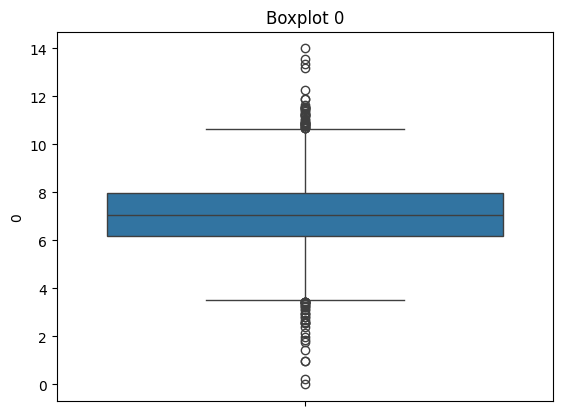

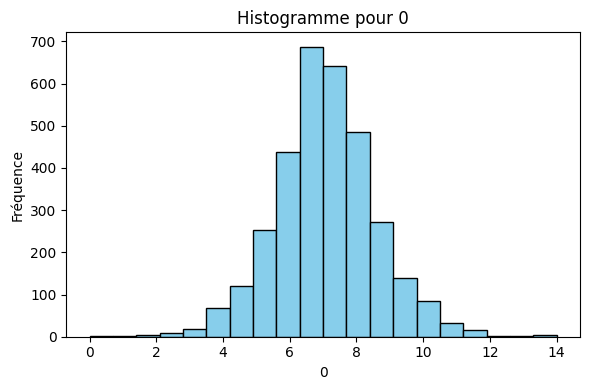

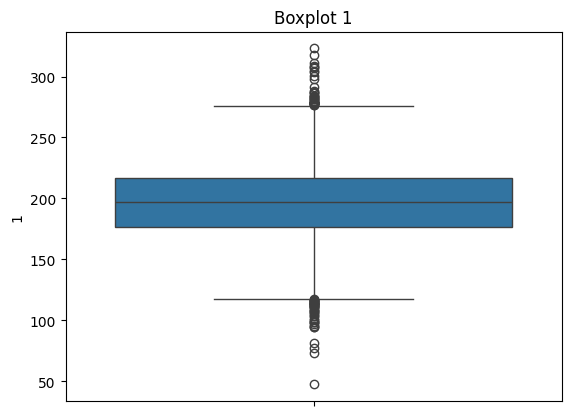

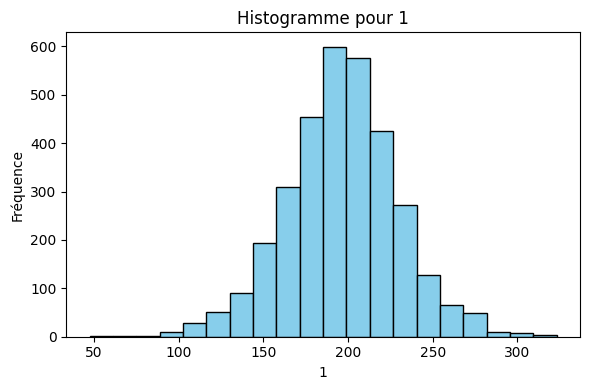

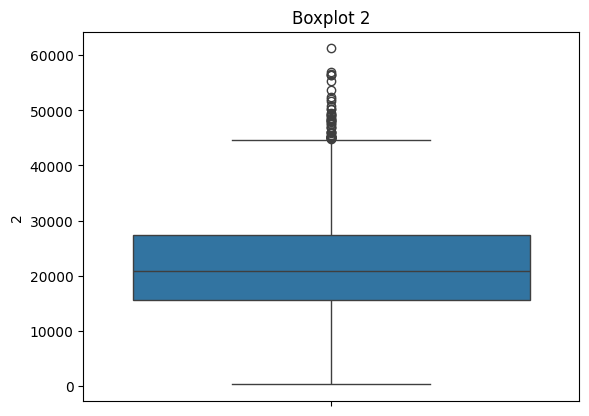

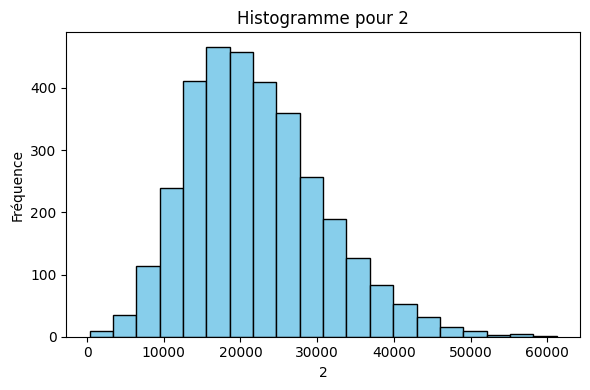

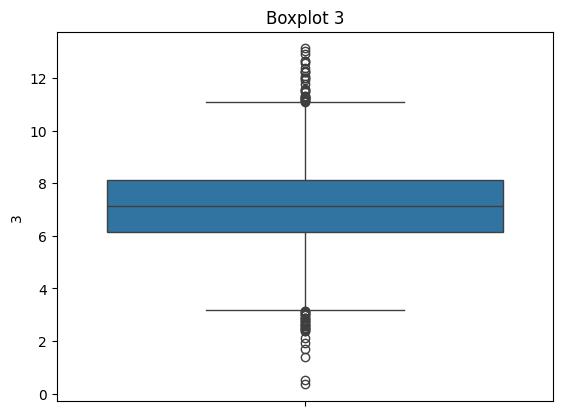

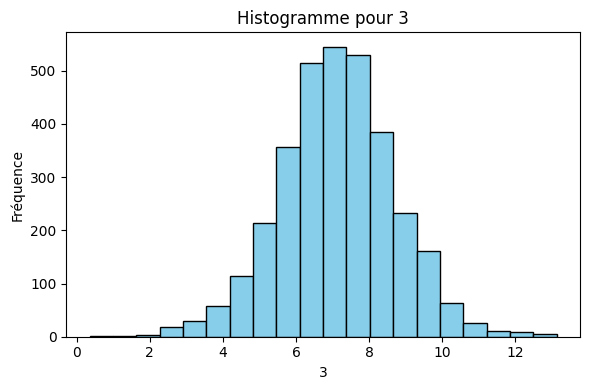

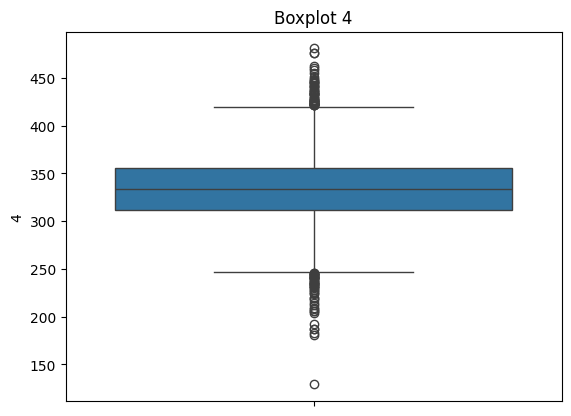

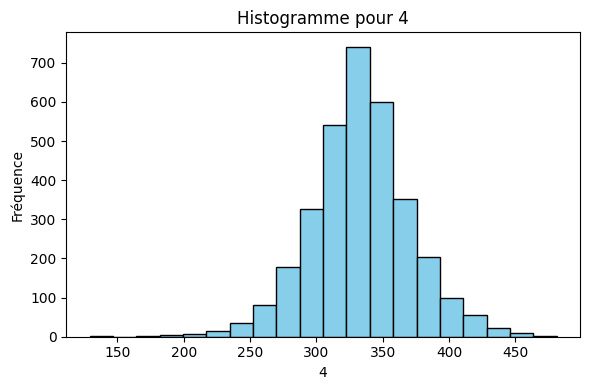

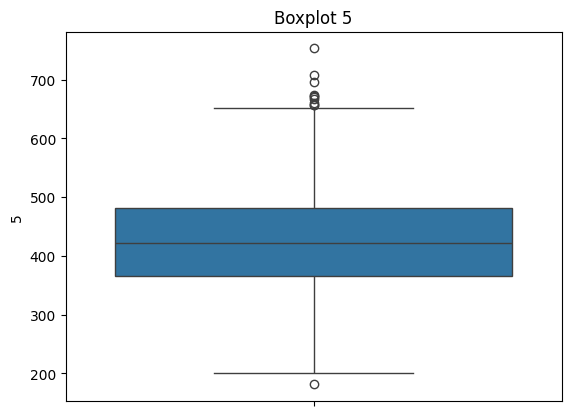

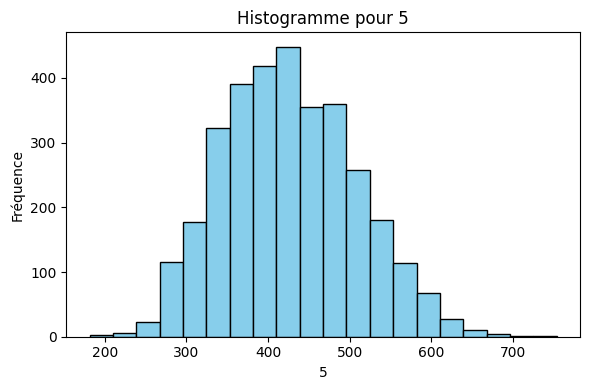

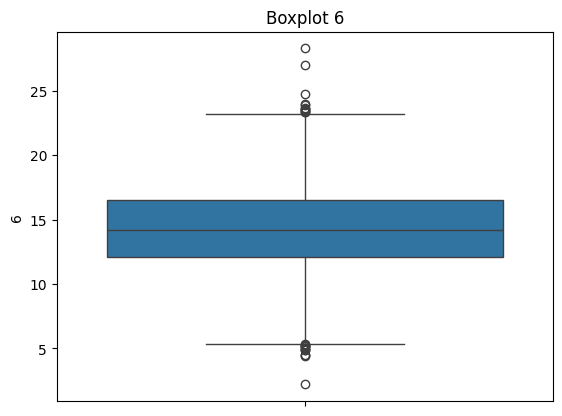

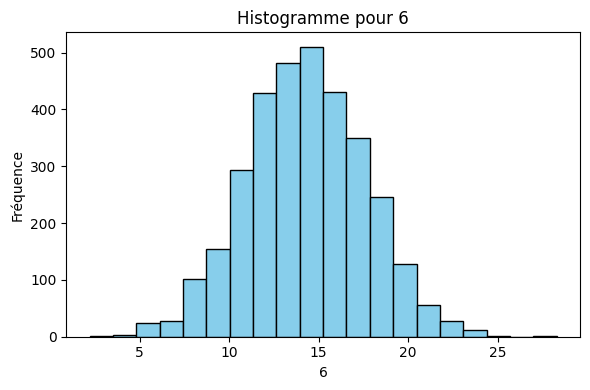

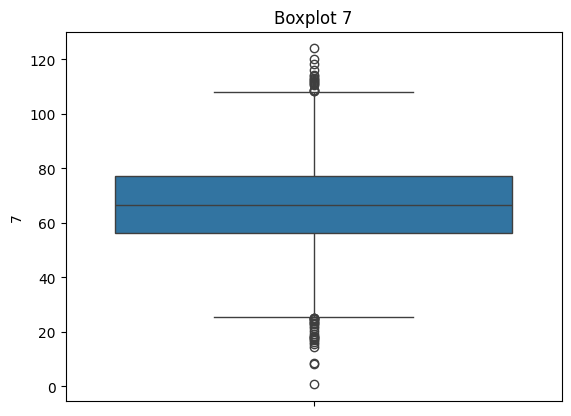

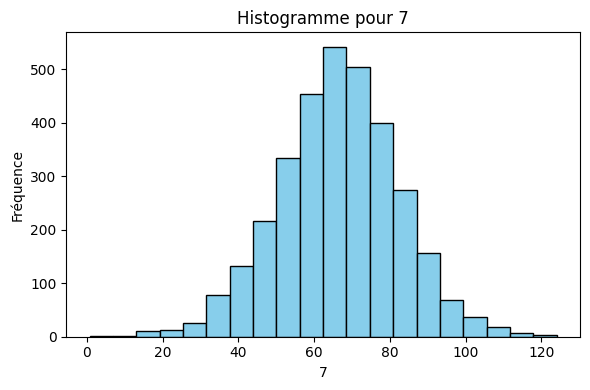

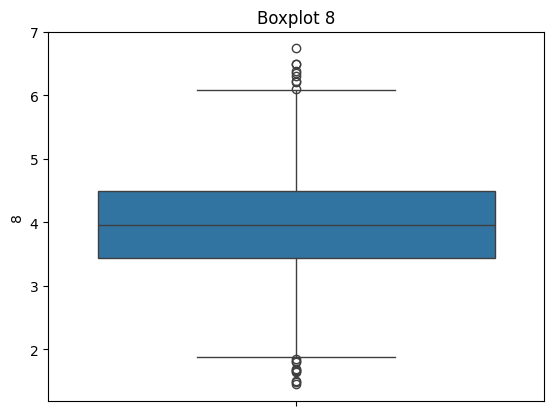

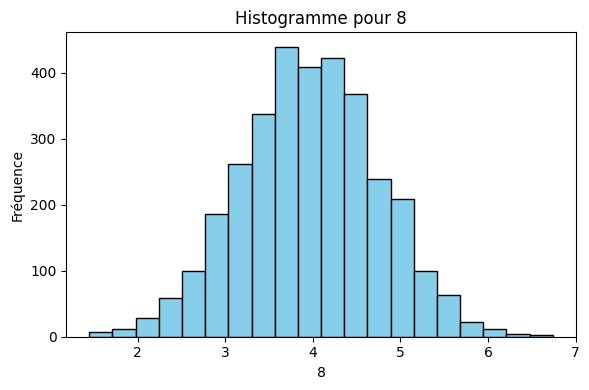

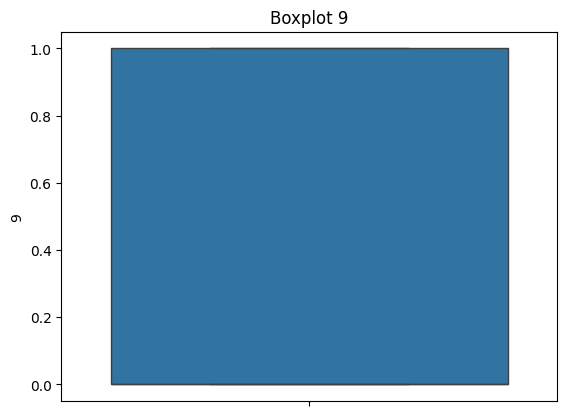

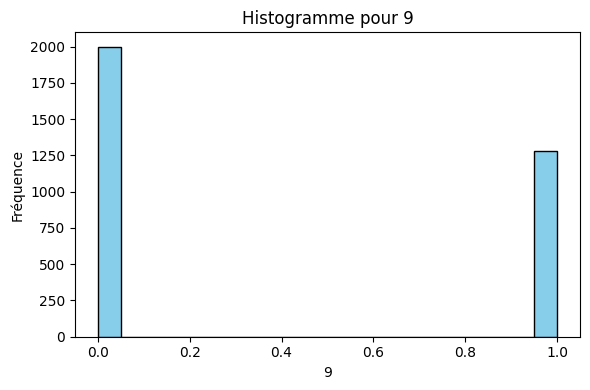

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.DataFrame(imputed_data_scikit)

for col in data.columns:
  sns.boxplot(data=data[col])
  plt.title(f'Boxplot {col}')
  plt.show()

  plt.figure(figsize=(6, 4))
  plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
  plt.title(f"Histogramme pour {col}")
  plt.xlabel(col)
  plt.ylabel("Fréquence")
  plt.tight_layout()
  plt.show()


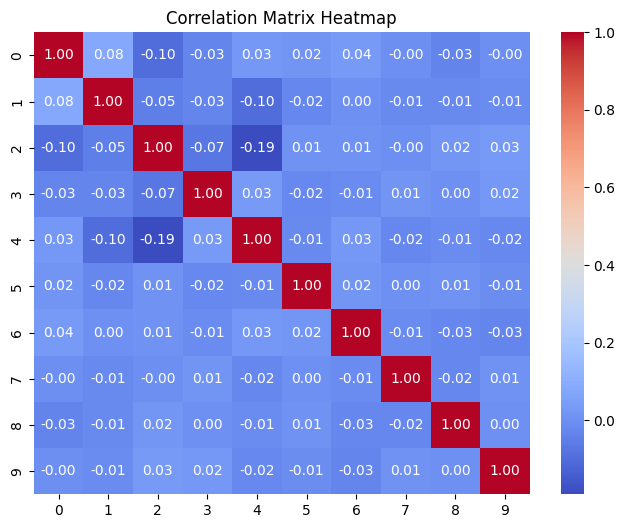

In [60]:
import numpy as np

def Standardisation(data):
  column_means = np.mean(data, axis=0)
  column_std = np.std(data, axis=0)

  return (data - column_means) / column_std

def MatriceCorrelation(Z, n):
  return 1/n * Z.T.dot(Z)

z = Standardisation(imputed_data_scikit)
matrice_correlation = MatriceCorrelation(z, imputed_data_scikit.shape[0])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [50]:
import numpy as np
import numbers as nb
from mealpy import FloatVar, SCA

# The goal:
# 1. Fill missing values randomly in the first iteration
# 2. Train the data using knn algorithem
# 3. Calculate the fitness
# 4. Generate new missing values vectors using the SCA algorithem
# repeat from inst 2 till the number of iterations  

data = np.genfromtxt("../../water_potability.csv", delimiter=",", skip_header=1) 
nan_cols = [0, 4, 7]
solutions = []
for i in nan_cols:
    col_with_nan = data[:, i]
    nan_n = np.sum(np.isnan(col_with_nan))
    print("number of nans: ", nan_n)
    col_with_nan = col_with_nan[~np.isnan(col_with_nan)]

    lb = (np.min(col_with_nan), ) * nan_n
    ub = (np.max(col_with_nan), ) * nan_n
    print("max: ", np.max(col_with_nan))
    print("min: ", np.min(col_with_nan))

    # Objective function will calculate the sum     print(nan_indices)of squared vector passed to it
    def objective_function(solution):
        return np.sum(solution**2)

    # FloatVar has a method that generates random numbers 
    problem_dict = {
        "bounds": FloatVar(lb=lb, ub=ub, name="delta"),
        "minmax": "min",
        "obj_func": objective_function
    }

    print(type(lb) is tuple)
    lb = np.array(lb, dtype=float)
    print(lb)

    # The algorithem will try to find the min of the solution based on the input

    model = SCA.OriginalSCA(epoch=100, pop_size=25)
    g_best = model.solve(problem_dict)

    print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
    print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
    solutions.append(g_best.solution)



2024/11/28 09:04:16 PM, INFO, mealpy.math_based.SCA.OriginalSCA: Solving single objective optimization problem.
2024/11/28 09:04:16 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 1, Current best: 25621.61654597328, Global best: 25621.61654597328, Runtime: 0.16226 seconds


number of nans:  491
max:  13.999999999999998
min:  0.0
True
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

2024/11/28 09:04:16 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 2, Current best: 20156.39166260849, Global best: 20156.39166260849, Runtime: 0.12544 seconds
2024/11/28 09:04:16 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 3, Current best: 19283.775505976784, Global best: 19283.775505976784, Runtime: 0.08950 seconds
2024/11/28 09:04:16 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 4, Current best: 19191.498885301582, Global best: 19191.498885301582, Runtime: 0.08465 seconds
2024/11/28 09:04:17 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 5, Current best: 17256.644666739747, Global best: 17256.644666739747, Runtime: 0.08543 seconds
2024/11/28 09:04:17 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 6, Current best: 15314.065051524463, Global best: 15314.065051524463, Runtime: 0.08622 seconds
2024/11/28 09:04:17 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 7, Cu

Solution: [9.28436413e-01 1.49462715e-01 3.01438677e-01 1.42783143e-01
 3.62975620e-03 1.69325204e-03 1.61636529e-01 1.64140014e-01
 3.57451776e-06 1.53020073e-01 1.03109595e-04 2.42837472e+00
 4.55770985e-01 5.12251312e+00 1.31986189e-01 3.16265773e+00
 4.05067989e-01 4.47517187e-05 7.02212828e-03 2.02528052e+00
 2.06176527e+00 1.10071262e-03 1.13751930e-02 5.87974946e-01
 2.18280668e+00 1.57434541e-01 1.30252824e+00 3.67589404e+00
 5.35096029e-03 2.51741497e+00 6.91003022e-03 3.66028303e-04
 1.23347866e-01 1.28686147e-02 3.41968446e-05 2.19203069e+00
 3.16159837e-01 2.86701146e+00 3.74192007e-01 2.14769957e-02
 7.76792227e-04 4.95860683e+00 9.15176419e-03 5.12633738e-01
 1.45491725e-01 9.25227355e-03 6.63383349e-03 4.54032858e-01
 9.19637387e-01 1.30362701e-01 8.49662967e-04 2.24562445e+00
 7.40168107e-05 7.54521761e-02 2.03162412e+00 9.15804405e-03
 1.80275031e-01 3.82858572e-01 2.62820909e-01 1.03576340e-02
 1.95801234e-05 1.79862672e-01 1.34008626e-03 7.42828431e-01
 1.11289209e-0

2024/11/28 09:04:26 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 2, Current best: 75038138.88610995, Global best: 75038138.88610995, Runtime: 0.15670 seconds
2024/11/28 09:04:26 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 3, Current best: 75038138.88610995, Global best: 75038138.88610995, Runtime: 0.13780 seconds
2024/11/28 09:04:26 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 4, Current best: 73871024.34783494, Global best: 73871024.34783494, Runtime: 0.13279 seconds
2024/11/28 09:04:26 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 5, Current best: 73871024.34783494, Global best: 73871024.34783494, Runtime: 0.13375 seconds
2024/11/28 09:04:27 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 6, Current best: 73871024.34783494, Global best: 73871024.34783494, Runtime: 0.13270 seconds
2024/11/28 09:04:27 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 7, Current be

Solution: [245.36269421 147.16971069 388.32874351 242.55141211 175.38354788
 190.31905895 135.46354073 332.4461339  398.9679121  475.10937321
 332.6653434  170.45226433 248.96180208 173.17934917 380.80633177
 228.06252685 157.31816716 359.42921967 212.06652064 175.70810245
 456.84581613 187.33134261 208.96686793 324.85555844 172.16699892
 199.77118973 292.09996893 265.51489707 145.07990551 161.97988659
 242.71219894 266.84679379 201.09534861 196.62858931 342.26331222
 159.55103266 266.95457151 352.10124852 436.28728951 297.82251834
 152.31360553 188.82818317 147.26621914 298.78781696 218.78261323
 195.63789213 233.54383075 325.49481144 293.57125729 269.3805034
 257.65063888 384.03000976 200.04669692 343.5996333  236.00322071
 423.71335732 152.75084503 393.27313746 270.82263074 205.44846409
 365.20935471 255.97102284 161.49618353 298.37102263 221.20907383
 240.95245664 209.14509509 348.09080071 160.42152971 175.00656173
 270.34038906 179.15781188 349.35347532 354.84716268 402.73718743
 

2024/11/28 09:04:40 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 6, Current best: 480801.31686671905, Global best: 480801.31686671905, Runtime: 0.03462 seconds
2024/11/28 09:04:40 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 7, Current best: 419957.1373803677, Global best: 419957.1373803677, Runtime: 0.04678 seconds
2024/11/28 09:04:40 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 8, Current best: 419957.1373803677, Global best: 419957.1373803677, Runtime: 0.03623 seconds
2024/11/28 09:04:40 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 9, Current best: 419957.1373803677, Global best: 419957.1373803677, Runtime: 0.03179 seconds
2024/11/28 09:04:40 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 10, Current best: 419957.1373803677, Global best: 419957.1373803677, Runtime: 0.03090 seconds
2024/11/28 09:04:40 PM, INFO, mealpy.math_based.SCA.OriginalSCA: >>>Problem: P, Epoch: 11, Curren

Solution: [ 6.26928976 22.12371789 17.04053128 27.1603228   1.55565767  5.10912405
 46.29075816  9.33319246 10.27216345  6.43468863 15.62476441  4.84090075
 20.07674383 24.53604568 18.24987682 30.01175024  2.72531864  4.19753158
 19.32704623 12.73229962  3.24265637 21.35624708  1.11820388 10.66956945
 28.65065253 24.18959243 37.29581958  4.24951228 23.83116418  1.87112649
  4.18660123 41.88992054 32.08600502  1.41857     9.55089944  1.06481326
  3.51587281 66.07310274 42.07618432  5.73304221 52.88476923  2.06159526
  1.61480342 41.30190868  7.19649167 14.54369917  1.66780123 38.92114374
 32.09003849 53.90975037  4.72870339  5.2791052  52.93712486 10.65862054
  3.93969127  1.55388452  3.71279015 33.52156337 14.9089192   6.06838401
  5.07584114 27.38283617  1.71840064 21.40906498  2.2138577  15.31585356
 33.72603062 43.36134156 36.73670056  6.14464777  3.22235806 16.91233918
 11.10148761  1.37831825 17.57771166  0.8158643   1.81875142 12.20885586
 28.4446538  43.6877178  31.92289417 15.7

Accuracy 0.6753048780487805
Max:  4.472688939659401
Min:  -4.94525472965751


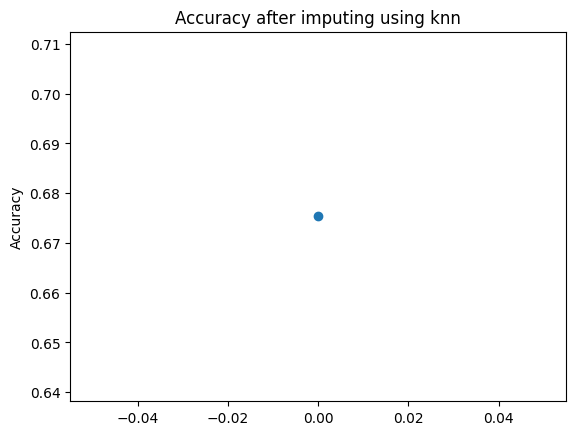

In [132]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data = np.genfromtxt("../../water_potability.csv", delimiter=",", skip_header=1) 

scaler = StandardScaler()

scaler.fit(data[:, 0:9])
data[:, 0:9] = scaler.transform(data[:, 0:9])

imputer = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
imputed_data_scikit = imputer.fit_transform(data)

X = imputed_data_scikit[:, 0:9]
y = imputed_data_scikit[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Max: ", np.max(imputed_data_scikit))
print("Min: ", np.min(imputed_data_scikit))
plt.plot(accuracy_score(y_test, y_pred), marker="o")
plt.title("Accuracy after imputing using knn")
plt.ylabel("Accuracy")
plt.show()

2024/12/01 11:53:11 AM, INFO, mealpy.math_based.SCA.DevSCA: Solving single objective optimization problem.
2024/12/01 11:53:11 AM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 1, Current best: 0.35060975609756095, Global best: 0.35060975609756095, Runtime: 0.17773 seconds
2024/12/01 11:53:11 AM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 2, Current best: 0.35060975609756095, Global best: 0.35060975609756095, Runtime: 0.17687 seconds
2024/12/01 11:53:12 AM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 3, Current best: 0.35060975609756095, Global best: 0.35060975609756095, Runtime: 0.20588 seconds
2024/12/01 11:53:12 AM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 4, Current best: 0.35060975609756095, Global best: 0.35060975609756095, Runtime: 0.18070 seconds
2024/12/01 11:53:12 AM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 5, Current best: 0.35060975609756095, Global best: 0.35060975609756095, Runtime: 0.18427 second

Solution: [-0.46315243  4.22481171  1.89145028 ...  1.68248484  0.49983336
 -3.31886153], Fitness: 0.31707317073170727
Solution: [-0.46315243  4.22481171  1.89145028 ...  1.68248484  0.49983336
 -3.31886153], Fitness: 0.31707317073170727


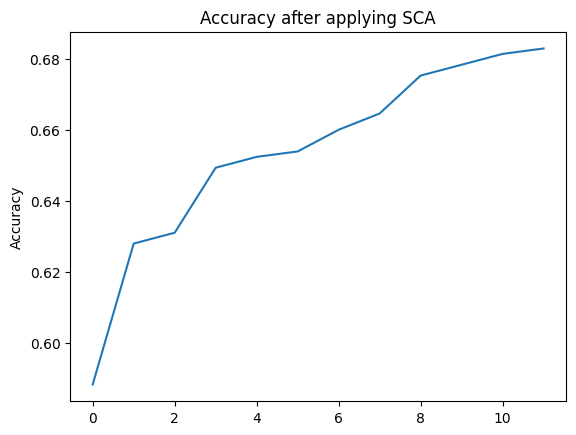

In [26]:

import numpy as np
import numbers as nb
from mealpy import FloatVar, SCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# The goal:
# 1. Fill missing values randomly in the first iteration
# 2. Train the data using knn algorithem
# 3. Calculate the fitness
# 4. Generate new missing values vectors using the SCA algorithem using the calculated fitness
# repeat from inst 2 till the number of iterations  

# What is fitness

data = np.genfromtxt("../../water_potability.csv", delimiter=",", skip_header=1) 

scaler = StandardScaler()

features = data[:, 0:9]
target = data[:, 9]
scaler.fit(features)
features = scaler.transform(features)

accuracies = []

nan_indices = np.array([
    (row, col)  # Tuple of (row, column) indices
    for col in range(features.shape[1])
    for row in np.argwhere(np.isnan(features[:, col])).flatten()
])

nan_n = np.sum(np.isnan(features)) 
features_without_nan = features[~np.isnan(features).any(axis=1)]

lb = (np.min(features_without_nan), ) * nan_n
ub = (np.max(features_without_nan), ) * nan_n


# Generate indices for the original dataset
indices = np.arange(data.shape[0])

# Use train_test_split on both data and indices
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    features, target, indices, test_size=0.2, random_state=42
)

# Objective function will calculate the sum of squared vector passed to it
def objective_function(solution):
    # The problem is here
    for k, (row, col) in enumerate(nan_indices):
        features[row, col] = solution[k]

    #X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    X_train = features[train_indices,:]
    X_test = features[test_indices, :]
    y_train = target[train_indices]
    y_test = target[test_indices]
    #print(f"X_train.shape: {X_train.shape}")
    #print(f"X_test.shape: {X_test.shape}")
    #print(f"y_train.shape: {y_train.shape}")
    #print(f"y_test.shape: {y_test.shape}")

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if(len(accuracies) == 0 or max(accuracies) < acc):
        accuracies.append(acc)

    return 1 - acc

# FloatVar has a method that generates random numbers 
problem_dict = {
    "bounds": FloatVar(lb=lb, ub=ub, name="delta"),
    "minmax": "min",
    "obj_func": objective_function
}

# The algorithem will try to find the min of the solution based on the input
pop_size = 5
epoch = 100
model = SCA.DevSCA(epoch=epoch, pop_size=pop_size)
g_best = model.solve(problem_dict)

print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")


plt.plot(accuracies)
plt.title("Accuracy after applying SCA")
plt.ylabel("Accuracy")
plt.show()

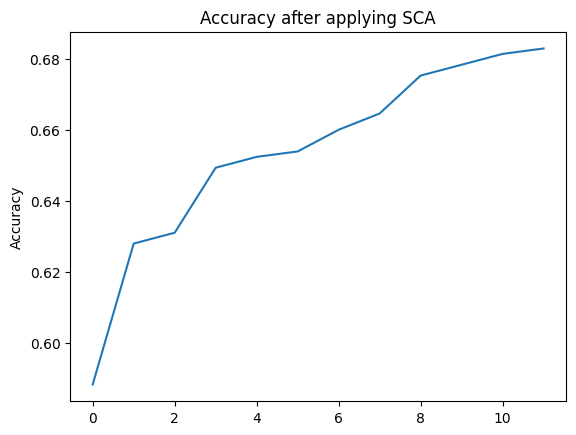

In [27]:
import matplotlib.pyplot as plt

plt.plot(accuracies)
plt.title("Accuracy after applying SCA")
plt.ylabel("Accuracy")
plt.show()

In [94]:
import numpy as np
import numbers as nb
from mealpy import FloatVar, SCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# The goal:
# 1. Fill missing values randomly in the first iteration
# 2. Train the data using knn algorithem
# 3. Calculate the fitness
# 4. Generate new missing values vectors using the SCA algorithem using the calculated fitness
# repeat from inst 2 till the number of iterations  

# What is fitness

data = np.genfromtxt("../../water_potability.csv", delimiter=",", skip_header=1) 

nan_cols = [0, 4, 7]
nan_indices = [[int(row) for row in np.argwhere(np.isnan(data[:, col])).flatten()] for col in nan_cols]

scaler = StandardScaler()

scaler.fit(data[:, 0:9])
data[:, 0:9] = scaler.transform(data[:, 0:9])

#clean_data = data[~np.isnan(data).any(axis=1)]

for i, col in enumerate(nan_cols):
    col_with_nan = data[:, col].copy()
    nan_n = len(nan_indices[i]) 

    col_without_nan = col_with_nan[~np.isnan(col_with_nan)]

    lb = (np.min(col_without_nan), ) * nan_n
    ub = (np.max(col_without_nan), ) * nan_n


    # Objective function will calculate the sum of squared vector passed to it
    def objective_function(solution):
        data_copy = data.copy()
        curr_col = data_copy[:, col]
        curr_col[nan_indices[i]] = solution
        data_copy[:, col] = curr_col 

        data_without_nans = data_copy[~np.isnan(data_copy).any(axis=1)]
        X = data_without_nans[:, 0:9]
        y = data_without_nans[:, 9]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        return 1 - accuracy_score(y_test, y_pred)

    # FloatVar has a method that generates random numbers 
    problem_dict = {
        "bounds": FloatVar(lb=lb, ub=ub, name="delta"),
        "minmax": "min",
        "obj_func": objective_function
    }

    # The algorithem will try to find the min of the solution based on the input

    model = SCA.DevSCA(epoch=100, pop_size=10)
    g_best = model.solve(problem_dict)

    print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
    print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")


    curr_col = data[:, col].copy()
    curr_col[nan_indices[i]] = g_best.solution
    data[:, col] = curr_col 


import matplotlib.pyplot as plt

X = data[:, 0:9]
y = data[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


plt.plot(accuracy_score(y_test, y_pred), marker="o")
plt.title("Accuracy after applying SCA")
plt.ylabel("Accuracy")
plt.show()

2024/11/29 12:20:06 PM, INFO, mealpy.math_based.SCA.DevSCA: Solving single objective optimization problem.
2024/11/29 12:20:06 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 1, Current best: 0.3536842105263158, Global best: 0.3536842105263158, Runtime: 0.26283 seconds
2024/11/29 12:20:06 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 2, Current best: 0.3452631578947368, Global best: 0.3452631578947368, Runtime: 0.24401 seconds
2024/11/29 12:20:07 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 3, Current best: 0.3452631578947368, Global best: 0.3452631578947368, Runtime: 0.25245 seconds
2024/11/29 12:20:07 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 4, Current best: 0.3452631578947368, Global best: 0.3452631578947368, Runtime: 0.26267 seconds
2024/11/29 12:20:07 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 5, Current best: 0.3431578947368421, Global best: 0.3431578947368421, Runtime: 0.22950 seconds
2024/11/

Solution: [ 2.70633372  0.99343381 -1.66485231 -2.5646717   1.1009886  -0.53706381
 -1.23128641  4.33332174  4.34069079  3.96813471 -4.44206196 -0.73093937
 -0.87250611  2.00376158 -2.27810722 -0.10731053 -4.44206196  4.3005421
  3.3022404  -0.25048883  1.3370833   0.45865508  0.10628252 -2.19358925
  0.16206756 -2.46330456  3.87899485 -2.77213074  2.34079511 -3.51204784
 -1.42790848 -3.40014288 -2.909419    1.63359096  2.11561208 -2.78179125
 -3.84804901  2.60913262  0.32689229  2.22988982  0.65015371  0.09481575
 -0.19198553 -4.21420301  4.27042066 -0.98871202  0.75491853  0.14607455
  0.38079658  4.34069079 -0.3175122   4.18615082 -4.44206196 -2.70325813
  1.16190348  4.34069079  0.18353053 -4.44206196  3.8780868  -2.85567579
 -4.44206196  0.64717455  2.09767486 -4.44206196  0.77174435  4.31618916
 -1.28283035  0.9220865  -4.44206196  2.56940867 -2.74341392  0.6655266
 -1.60953109 -2.78388666 -0.87576299 -4.44206196  1.32204547 -3.51494619
 -0.67041449 -2.19837924 -1.75028314  2.813

2024/11/29 12:20:29 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 1, Current best: 0.3531300160513644, Global best: 0.3531300160513644, Runtime: 0.32865 seconds
2024/11/29 12:20:30 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 2, Current best: 0.3531300160513644, Global best: 0.3531300160513644, Runtime: 0.36306 seconds
2024/11/29 12:20:30 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 3, Current best: 0.3531300160513644, Global best: 0.3531300160513644, Runtime: 0.39497 seconds
2024/11/29 12:20:31 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 4, Current best: 0.3531300160513644, Global best: 0.3531300160513644, Runtime: 0.36036 seconds
2024/11/29 12:20:31 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 5, Current best: 0.3531300160513644, Global best: 0.3531300160513644, Runtime: 0.38000 seconds
2024/11/29 12:20:31 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 6, Current best: 0.34831460674157

Solution: [ 3.55614728e+00 -4.94525473e+00 -1.48948324e+00  3.35338491e-02
  7.15926859e-01  2.94084489e+00 -4.28408869e+00 -3.97394193e+00
 -6.35185082e-01 -4.33241580e+00  1.53782869e+00  2.10081067e-01
 -2.62411225e+00 -4.60899003e+00 -7.01072411e-01  3.09843257e+00
  3.55614728e+00  2.42716878e+00  2.66146511e+00  2.47314585e+00
 -2.86993725e+00 -5.35368783e-01  6.15678035e-01 -4.88968211e-01
 -2.97222800e+00  1.45540416e+00  3.54761758e+00 -1.83158935e+00
  8.39151620e-01  4.46503502e-01 -1.33710772e+00 -4.92029421e+00
  2.72234860e+00  5.27085565e-01  2.00858267e+00 -1.48506343e+00
 -2.27486202e+00  2.81125899e+00 -2.94057991e+00  5.39545223e-03
  9.05885811e-02  3.41282086e+00 -4.33643967e+00 -2.46603583e+00
  1.40832486e+00  3.55614728e+00 -2.41486052e+00 -1.09109695e-01
 -3.71531148e+00 -2.96487273e+00 -1.77550890e+00 -9.77637856e-02
 -1.56401602e+00  3.47039267e+00  2.12369205e+00 -1.85871015e+00
 -3.39389620e+00  3.50335848e+00 -8.62838194e-01 -4.66775285e+00
  2.85112550e+0

2024/11/29 12:21:04 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 1, Current best: 0.33841463414634143, Global best: 0.33841463414634143, Runtime: 0.35406 seconds
2024/11/29 12:21:04 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 2, Current best: 0.33689024390243905, Global best: 0.33689024390243905, Runtime: 0.37582 seconds
2024/11/29 12:21:05 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 3, Current best: 0.33689024390243905, Global best: 0.33689024390243905, Runtime: 0.50808 seconds
2024/11/29 12:21:05 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 4, Current best: 0.33384146341463417, Global best: 0.33384146341463417, Runtime: 0.37666 seconds
2024/11/29 12:21:05 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 5, Current best: 0.33384146341463417, Global best: 0.33384146341463417, Runtime: 0.36080 seconds
2024/11/29 12:21:06 PM, INFO, mealpy.math_based.SCA.DevSCA: >>>Problem: P, Epoch: 6, Current best: 0.3338

KeyboardInterrupt: 